In [0]:
import os
try:
  import wget
except: 
  !pip install wget
  import wget
import tarfile


out_dir = 'data/not_mnist'
small_arhive = f'{out_dir}/notMNIST_small.tar.gz'
large_arhive = f'{out_dir}/notMNIST_large.tar.gz'
large_url = 'https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz'
small_url = 'https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz'

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=386cf16b8fc3111a0a46ec327c4b83a5d584d93e50a5f9105517ca934dd9ab79
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
if not os.path.exists(out_dir):
  os.makedirs(out_dir)

if not os.path.exists(small_arhive):
  print(f"Downloading {small_arhive}.")
  wget.download(small_url, small_arhive)
  print()
else:
  print(f"Skipping {small_arhive} download (already exists)")

if not os.path.exists(large_arhive):
  print(f"Downloading {large_arhive}.")
  wget.download(large_url, large_arhive)
  print()
else:
  print(f"Skipping {large_arhive} download (already exists)")

In [0]:
print(f"Extracting {small_arhive}")
with tarfile.open(small_arhive) as tar:
  tar.extractall(out_dir)

print(f"Extracting {large_arhive}")
with tarfile.open(large_arhive) as tar:
  tar.extractall(out_dir)

Extracting data/not_mnist/notMNIST_small.tar.gz
Extracting data/not_mnist/notMNIST_large.tar.gz


In [0]:
import numpy as np
from pathlib import Path
from PIL import Image

def remove_duplicates(img_train, labels_train, img_test):
    img_new, labels_new = [], []
    test_set = {e.tostring() for e in img_test}
    for i, (x, y) in enumerate(zip(img_train, labels_train)):
        if x.tostring() not in test_set:
            img_new.append(x)
            labels_new.append(y)

    print(f'Removed {img_train.shape[0] - len(img_new)} duplicated images')
    return np.array(img_new), np.array(labels_new)

def load_images(path, n):
    labels = ['I', 'G', 'A', 'F', 'H', 'J', 'C', 'D', 'E', 'B']

    x, y = [], []
    for i, l in enumerate(labels):
        d = Path(path) / l
        print(f'Loading {str(d)} ', end='')
        for j, f in zip(range(n), d.iterdir()):
            try:
                with Image.open(f) as img:
                    x.append(np.array(img))
                    y.append(i)
            except OSError:
                pass
            if j % 1000 == 0:
                print('.', end='', flush=True)
        print(flush=True)
    return np.array(labels), np.array(x), np.array(y)

def load_not_mnist_data(path='data/not_mnist/', use_cache=True):
    train_folder = Path(path) / 'notMNIST_large'
    test_folder = Path(path) / 'notMNIST_small'

    train_cache_file = Path(path) / 'train.npz'
    test_cache_file = Path(path) / 'test.npz'

    if train_cache_file.exists() and test_cache_file.exists() and use_cache:
        f = np.load(train_cache_file)
        labels, img_train, labels_train = [v for k, v in f.items()]
        f = np.load(test_cache_file)
        labels, img_test, labels_test = [v for k, v in f.items()]
        print('Loaded cached arrays')

    else:
        labels, img_train, labels_train = load_images(train_folder, 10000000)
        labels, img_test, labels_test = load_images(test_folder, 10000000)
        np.savez(train_cache_file, labels, img_train, labels_train)
        np.savez(test_cache_file, labels, img_test, labels_test)

    return labels, img_train, labels_train, img_test, labels_test

In [0]:
load_not_mnist_data()

Loading data/not_mnist/notMNIST_large/I .....................................................
Loading data/not_mnist/notMNIST_large/G .....................................................
Loading data/not_mnist/notMNIST_large/A .....................................................
Loading data/not_mnist/notMNIST_large/F .....................................................
Loading data/not_mnist/notMNIST_large/H .....................................................
Loading data/not_mnist/notMNIST_large/J .....................................................
Loading data/not_mnist/notMNIST_large/C .....................................................
Loading data/not_mnist/notMNIST_large/D .....................................................
Loading data/not_mnist/notMNIST_large/E .....................................................
Loading data/not_mnist/notMNIST_large/B .....................................................
Loading data/not_mnist/notMNIST_small/I ..
Loading data/not_

(array(['I', 'G', 'A', 'F', 'H', 'J', 'C', 'D', 'E', 'B'], dtype='<U1'),
 array([[[  0,   0,   0, ..., 167,  89,  13],
         [  0,   0,   0, ..., 254, 150,  10],
         [  0,   0,   0, ..., 178,  87,   0],
         ...,
         [ 15, 132, 227, ...,   0,   0,   0],
         [160, 215, 255, ...,   0,   0,   0],
         [170, 209, 241, ...,   0,   0,   0]],
 
        [[  0,   0,   0, ..., 198, 216, 126],
         [  0,   0,   0, ..., 143, 144,  79],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ..., 138, 139,  77],
         [  0,   0,   0, ..., 202, 219, 128]],
 
        [[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],
 
        ...,
 
        [[  0,   0,   0, ...,  14

In [0]:
labels, img_train, labels_train, img_test, labels_test = load_not_mnist_data()

Loaded cached arrays


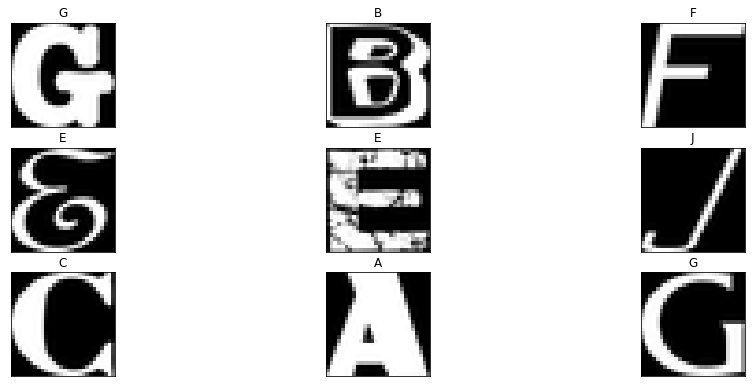

In [0]:
import matplotlib.pyplot as plt




rows = 3
cols = 3
fig = plt.figure(figsize=(16, 6.5))
for i in range(1, cols * rows + 1):
    ax = fig.add_subplot(rows, cols, i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set
    
    j = np.random.randint(0, labels_test.shape[0] - 1)
    ax.set_title(labels[labels_test[j]])
    plt.imshow(img_test[j], cmap='gray')

defaultdict(<class 'int'>, {'I': 52912, 'G': 52912, 'A': 52909, 'F': 52912, 'H': 52912, 'J': 52911, 'C': 52912, 'D': 52911, 'E': 52912, 'B': 52911})
defaultdict(<class 'int'>, {'I': 1872, 'G': 1872, 'A': 1872, 'F': 1872, 'H': 1872, 'J': 1872, 'C': 1873, 'D': 1873, 'E': 1873, 'B': 1873})


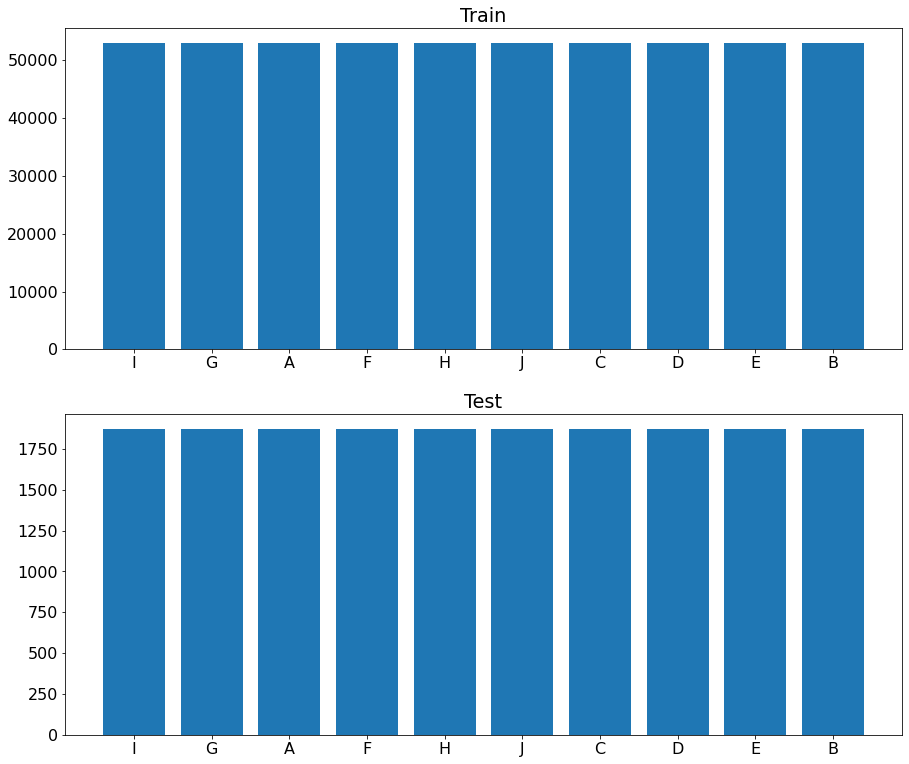

In [0]:
from collections import defaultdict

plt.rcParams['font.size'] = 16

def show_balance(title, ax, a, labels):
    counts = defaultdict(int)
    for e in a:
        counts[labels[e]] += 1
        
    print(counts)
        
    ax.bar(counts.keys(), counts.values())
    ax.set_title(title)
    
fig = plt.figure(figsize=(15, 13), )
show_balance("Train", fig.add_subplot(2, 1, 1), labels_train, labels)
show_balance("Test", fig.add_subplot(2, 1, 2), labels_test, labels)

In [0]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split

def flatten(a):
    return a.reshape(a.shape[0], a.shape[1] * a.shape[2])

def load_data():
    labels, img_train, labels_train, img_test, labels_test = load_not_mnist_data()
    img_train, labels_train = remove_duplicates(img_train, labels_train, img_test)
    return labels, flatten(img_train), labels_train, flatten(img_test), labels_test

In [0]:

_, x_train, y_train, x_test, y_test = load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=200000, test_size=10000)
print(x_train.shape)
print(y_train.shape)
print(y_val.shape)
x_train, y_train = remove_duplicates(x_train, y_train, x_val)
print(x_train.shape)
print(y_train.shape)
print(y_val.shape)


Loaded cached arrays
Removed 12213 duplicated images
(200000, 784)
(200000,)
(10000,)
Removed 1316 duplicated images
(198684, 784)
(198684,)
(10000,)


In [0]:
results = {}
results.setdefault('val_acc', {})
ns = [50, 100, 1000, 50000]

print('Training Logistic Regression model:')
for n in ns:
  count = np.arange(len(x_train))
  if n < len(x_train):
    count = np.random.choice(count, n, replace=False)

  # model = SGDClassifier(loss='log', tol=1e-4, early_stopping=True)
  model = LogisticRegression(max_iter = 10000)
  model.fit(x_train[count], y_train[count])

  y_pred = model.predict(x_val)
  results["val_acc"][str(n)] = acc = np.mean(np.equal(y_pred, y_val).astype(np.int))
  print(f"n = {n}, accuracy = {acc:.5f}, iterations = {model.n_iter_}")

Training Logistic Regression model:
n = 50, accuracy = 0.53190, iterations = [66]
n = 100, accuracy = 0.68750, iterations = [101]
n = 1000, accuracy = 0.75490, iterations = [473]
n = 50000, accuracy = 0.81580, iterations = [5157]


In [0]:
print (results["val_acc"].keys())
print (results["val_acc"].values())

dict_keys(['50', '100', '1000', '50000'])
dict_values([0.5319, 0.6875, 0.7549, 0.8158])


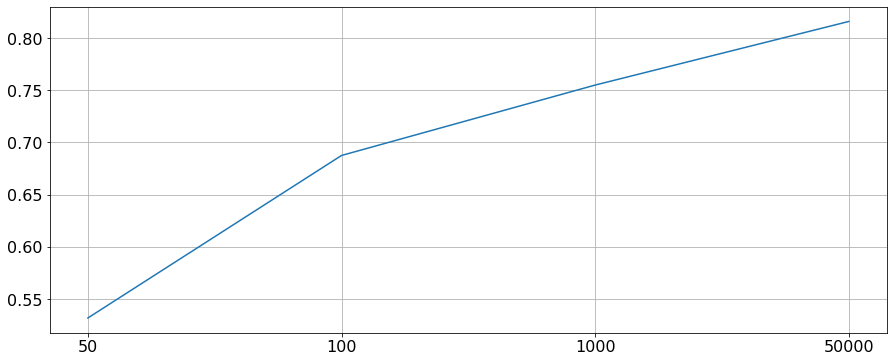

In [0]:
# The Data
x = list(results["val_acc"].keys())
y = list(results["val_acc"].values())

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(15, 6))

# Plot the data
ax.plot(x,y)

# Show the grid lines as dark grey lines
plt.grid()

plt.show()